<a href="https://colab.research.google.com/github/EniolaAke/priceprediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [ ]:
#Load "price_prediction.csv" data
data = pd.read_csv("price_prediction.csv")
print (data)

          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

In [ ]:
# Separate features (X) and target (y)
X = data.drop('MSRP', axis=1)
y = data['MSRP']

In [ ]:
#Performing data cleaning and preprocessing to remove rows with missing values.
#Drop missing: drop row contains missing value
X.dropna()
X.dropna(inplace=True)
X.dropna(how='any').shape
# Remove duplicate rows
data = data.drop_duplicates()

In [ ]:
# Remove rows with any NaN values
data = data.dropna()

In [ ]:
# Separate features (X) and target (y)
X = data.drop('MSRP', axis=1)
y = data['MSRP']

In [ ]:
# Encode categorical variables
categorical_cols = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']
le = LabelEncoder()
ohe = OneHotEncoder()

In [ ]:
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [ ]:
# To handle missing values in target variable
y = data['MSRP']
y = y.fillna(y.mean()) # Impute missing values in MSRP with the mean

# Convert the NumPy array to a Pandas DataFrame
y = pd.DataFrame(y, columns=['MSRP'])

In [ ]:
# Feature selection
rfe = RFE(LinearRegression(), n_features_to_select=15)
X_selected = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.get_support()]

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build and evaluate models
models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression', Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])),
    ('KNN Regression', KNeighborsRegressor()),
    ('Decision Tree Regression', DecisionTreeRegressor())
]

In [ ]:
for name, regression_model in models:
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R^2: {r2:.2f}")
    print()

Linear Regression:
MAE: 23958.65
MSE: 3090030756.40
R^2: 0.45

Polynomial Regression:
MAE: 17328.84
MSE: 2015947806.23
R^2: 0.64

KNN Regression:
MAE: 6528.69
MSE: 1446364264.83
R^2: 0.74

Decision Tree Regression:
MAE: 4471.68
MSE: 921334925.79
R^2: 0.84



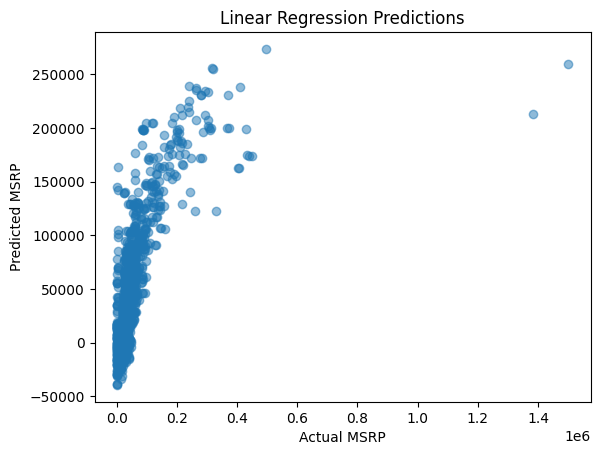

In [ ]:
# To visualize the Linear Regression Model
# Visualize Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.title('Linear Regression Predictions')
plt.show()

In [ ]:
# Visualize Polynomial Regression
# Separate features (X) and target (y)
X = data[['Engine HP', 'Engine Cylinders', 'highway MPG']]
y = data['MSRP']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a polynomial regression model
degree = 2  # Set the desired degree for polynomial features
poly_model = PolynomialFeatures(degree=degree)
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.transform(X_test)

In [ ]:
# Train the linear regression model on the polynomial features
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Evaluate the model on the test set
y_pred = linear_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2384866408.38
R-squared: 0.57


In [ ]:
# Visualize the polynomial regression
x_plot = np.linspace(X_train['Engine HP'].min(), X_train['Engine HP'].max(), 100)
X_plot = np.column_stack((x_plot, np.ones_like(x_plot) * X_train['Engine Cylinders'].mean(), np.ones_like(x_plot) * X_train['highway MPG'].mean()))
X_plot_poly = poly_model.transform(X_plot)
y_plot = linear_model.predict(X_plot_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


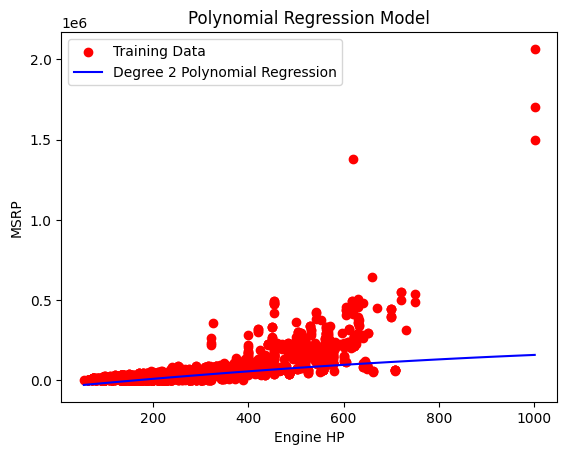

In [ ]:
plt.scatter(X_train['Engine HP'], y_train, color='red', label='Training Data')
plt.plot(x_plot, y_plot, color='blue', label=f'Degree {degree} Polynomial Regression')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Polynomial Regression Model')
plt.legend()
plt.show()

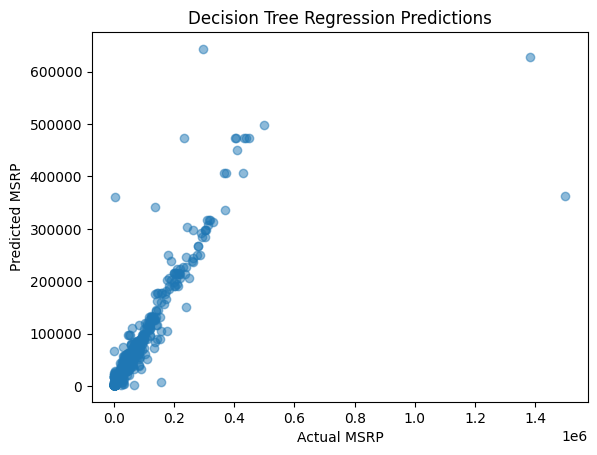

In [ ]:
# Visualize Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.title('Decision Tree Regression Predictions')
plt.show()

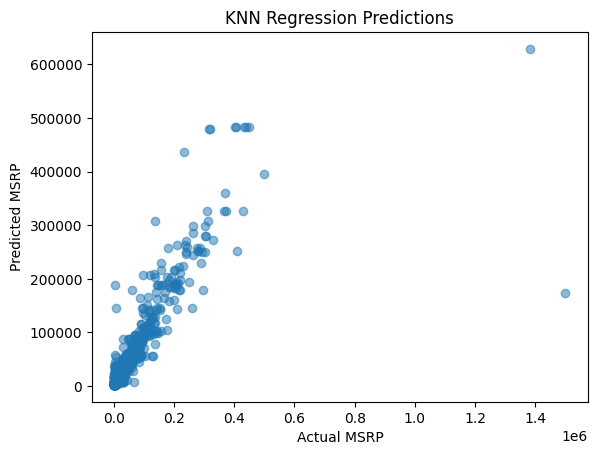

In [ ]:
# Visualize KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.title('KNN Regression Predictions')
plt.show()